Movie Genre Data Analysis


Introduction

We are going to focus highly on genre's. I want to know everything about Genre's.
Here are some things I want to look at:


Research Questions (Q):

Which genres are the most common (number of movies made)?

Which genres have high avg. budget and revenue?

Which genres have high avg. popularity?

Which genres have highest number of movies with an voting avg. >=8?

Research Hypotheses (H):

The best movies according to vote avg. return high profit and revenue.

The best movies according to popularity return high profit and revenue.

Highly budgeted movies return high revenue and profit.

Highly budgeted movies have a high popularity.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\imdb_movies (1).csv")

In [3]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.dropna(subset=['genres'],inplace=True)

In [9]:
df['profit']=df['revenue']-df['budget']

In [10]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00,0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00,0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00,0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00,0


In [21]:

df_genre = df[['popularity','budget','revenue','original_title','runtime','genres','release_date','vote_count','vote_average','profit']]

In [22]:
df_genre

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,1316249360
...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,95,Documentary,6/15/66,11,7.4,0
10862,0.065543,0,0,Grand Prix,176,Action|Adventure|Drama,12/21/66,20,5.7,0
10863,0.065141,0,0,Beregis Avtomobilya,94,Mystery|Comedy,1/1/66,11,6.5,0
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,Action|Comedy,11/2/66,22,5.4,0


In [13]:
df_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,1316249360


In [23]:
from pandas import Series, DataFrame


In [24]:
split = df_genre['genres'].str.split('|').apply(pd.Series, 1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
del df_genre['genres']
df_genre = df_genre.join(split)



In [25]:
df_genre

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,228436354,Action
...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,0,Mystery
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,0,Comedy
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,0,Action
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,0,Comedy


## Research Questions (Q):


## 1.Which genres are the most common (number of movies made)?

In [26]:
genres_count = pd. DataFrame(df_genre.groupby ('genres_split').original_title.nunique()).sort_values('original_title')

<AxesSubplot:title={'center':'Movies Per Genre in %'}, ylabel='original_title'>

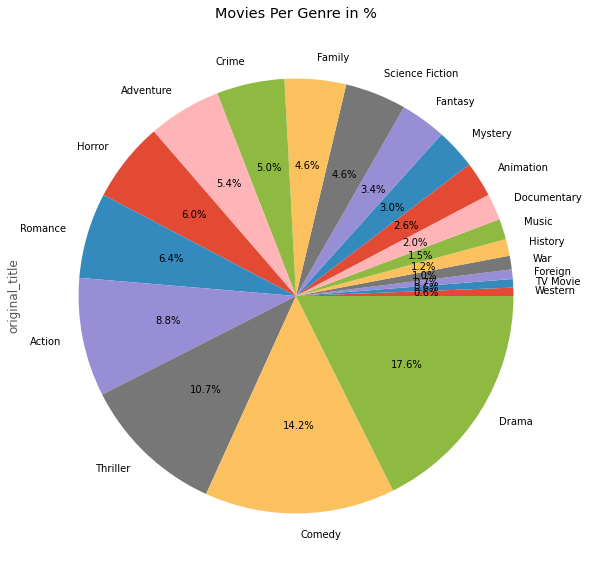

In [27]:
genres_count['original_title'].plot.pie(title='Movies Per Genre in %',autopct='%1.1f%%',figsize = (10,10))

<AxesSubplot:title={'center':'Movies Per Genre'}, ylabel='genres_split'>

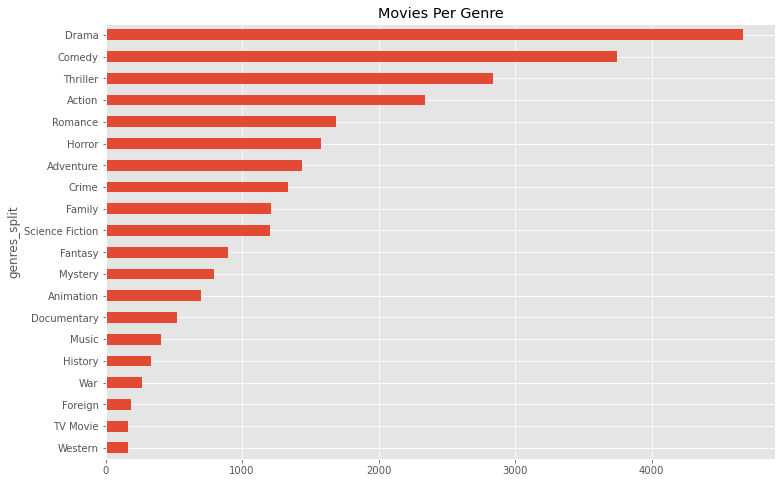

In [28]:
genres_count['original_title'].plot.barh(title='Movies Per Genre')

# 2.Which genres have high avg. budget and revenue?

In [29]:
genres_avg = df_genre.groupby ('genres_split').mean()
pd.options.display.float_format = '{:2f}'.format
genres_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Action,0.926274,27727820.331376,72794732.002517,104.917785,392.993708,5.787752,45066911.671141
Adventure,1.154259,37543694.530931,113137861.069341,106.173351,513.125085,5.940585,75594166.538409
Animation,0.852182,23159781.606581,75256062.223176,68.181688,303.000000,6.403147,52096280.616595
Comedy,0.592607,13297915.618244,37526242.072238,96.745057,176.436330,5.905167,24228326.453994
Crime,0.744930,17663801.124815,42368661.645495,106.917282,278.805022,6.124889,24704860.520679
Documentary,0.181432,577149.148077,2041106.994231,102.651923,35.105769,6.908462,1463957.846154
Drama,0.591495,11880717.773529,29232255.725840,110.478151,182.544538,6.165546,17351537.952311
Family,0.786668,23359337.420796,72433176.373680,89.603574,272.320877,5.997563,49073838.952884
Fantasy,0.992840,32612585.348253,96313657.081878,100.736900,420.741266,5.863537,63701071.733624


In [30]:
genres_avg.sort_values('budget',ascending=True,inplace=True)

<AxesSubplot:title={'center':'Budget and Revenue by Genre'}, ylabel='genres_split'>

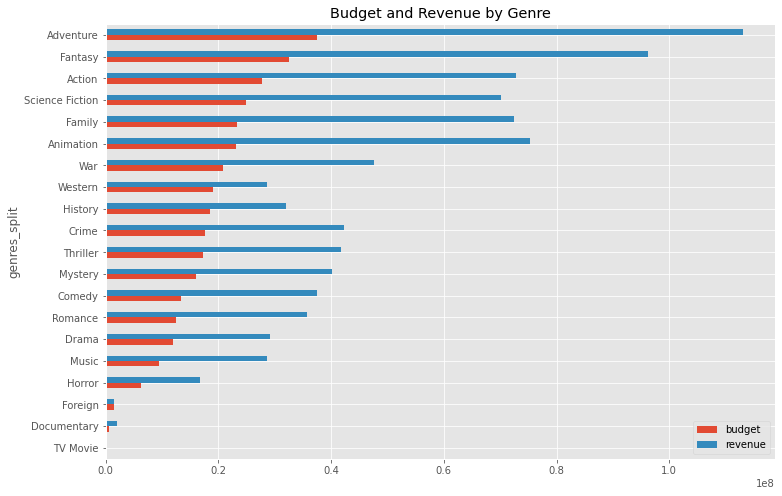

In [31]:
genres_avg[['budget','revenue']].plot.barh(title='Budget and Revenue by Genre')

## 3. Which genres have high avg. profit?

In [32]:
genres_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
TV Movie,0.270896,267664.670659,251497.005988,91.982036,34.365269,5.788024,-16167.664671
Documentary,0.181432,577149.148077,2041106.994231,102.651923,35.105769,6.908462,1463957.846154
Foreign,0.191496,1451434.925532,1520459.835106,107.228723,16.627660,5.981383,69024.909574
Horror,0.465357,6226529.210751,16822808.624313,94.424557,120.059866,5.337447,10596279.413561
Music,0.487321,9438627.549020,28571768.691176,105.137255,124.340686,6.480392,19133141.142157
Drama,0.591495,11880717.773529,29232255.725840,110.478151,182.544538,6.165546,17351537.952311
Romance,0.592082,12531271.847547,35691972.327103,106.891355,166.070678,6.042874,23160700.479556
Comedy,0.592607,13297915.618244,37526242.072238,96.745057,176.436330,5.905167,24228326.453994
Mystery,0.690012,16119270.062963,40217566.661728,105.928395,236.998765,5.946790,24098296.598765


In [33]:
genres_avg.sort_values('profit',ascending=True,inplace=True)

<AxesSubplot:title={'center':'Profit by Genre'}, ylabel='genres_split'>

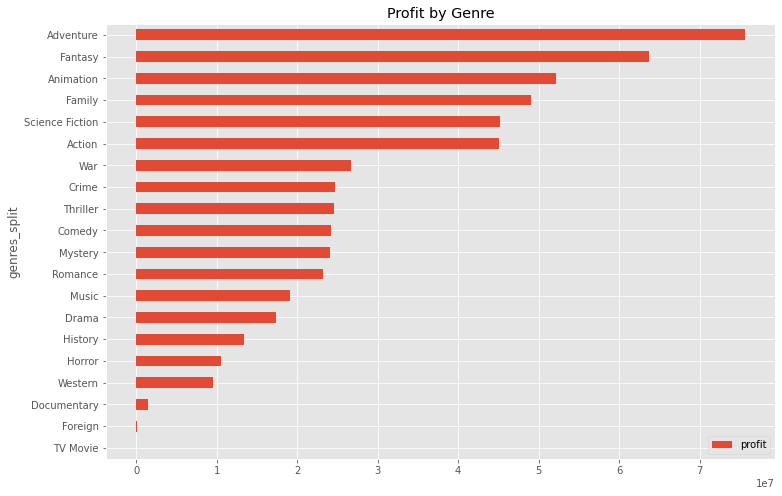

In [34]:
genres_avg[['profit']].plot.barh(title='Profit by Genre')

## 4.Which genres have high avg. popularity?

In [35]:
genres_avg.sort_values('popularity',ascending=True,inplace=True)

<AxesSubplot:title={'center':'Popularity by Genre'}, ylabel='genres_split'>

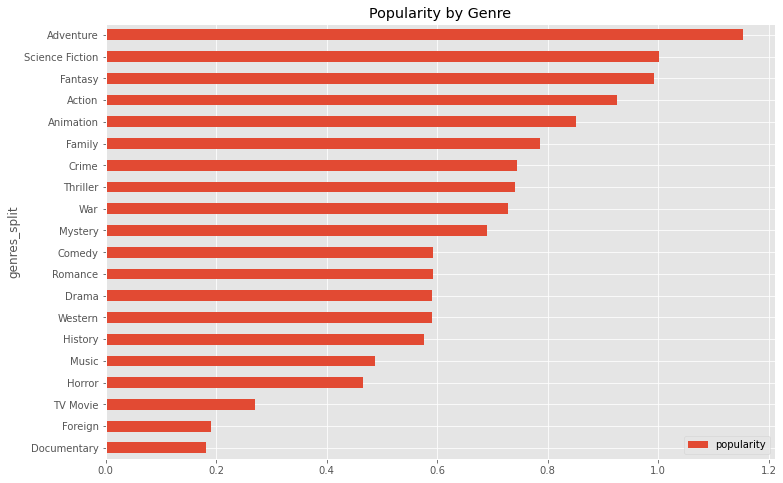

In [36]:
genres_avg[['popularity']].plot.barh(title='Popularity by Genre')

## 5.Which genres have highest number of movies with an voting avg. >=8?

In [28]:
df_genre.head()

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Action|Adventure|Science Fiction|Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.100000,228436354,Action|Adventure|Science Fiction|Thriller
2,13.112507,110000000,295238201,Insurgent,119,3/18/15,2480,6.300000,185238201,Adventure|Science Fiction|Thriller
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,12/15/15,5292,7.500000,1868178225,Action|Adventure|Science Fiction|Fantasy
4,9.335014,190000000,1506249360,Furious 7,137,4/1/15,2947,7.300000,1316249360,Action|Crime|Thriller


In [29]:
vote_fifty = df_genre[(df_genre['vote_count']>=50) & (df_genre['vote_average']>=8)]

In [30]:
vote_zero = df_genre[  df_genre['vote_average']>=8]
vote_zero

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
9,6.326804,175000000,853708609,Inside Out,94,6/9/15,3935,8.000000,678708609,Comedy|Animation|Family
35,3.557846,6000000,35401758,Room,117,10/16/15,1520,8.000000,29401758,Drama|Thriller
377,0.198522,0,0,Hitting the Apex,138,9/2/15,14,8.000000,0,Documentary
441,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,98,10/9/15,37,8.200000,0,Documentary
536,0.122543,0,0,A Faster Horse,90,10/8/15,12,8.000000,0,Documentary
...,...,...,...,...,...,...,...,...,...,...
9979,2.659926,25000000,46836394,Goodfellas,146,9/12/90,1798,8.000000,21836394,Drama|Crime
10141,2.610362,806948,32000000,Psycho,109,8/14/60,1180,8.000000,31193052,Drama|Horror|Thriller
10222,2.377288,22000000,321265768,Schindler's List,195,11/29/93,2632,8.100000,299265768,Drama|History|War
10575,0.195770,0,0,MacskafogÃ³,96,10/2/86,12,8.000000,0,Animation|Family


In [31]:
genres_vote = pd. DataFrame(vote_fifty.groupby ('genres_split').vote_average.nunique()).sort_values('vote_average',ascending=True)

In [32]:
genres_vote

,vote_average
genres_split,
Action|Drama|War,1
Romance|Comedy|Animation|Drama|Family,1
Mystery|Documentary|Crime,1
History|Drama|Thriller|War,1
Fantasy|Drama|Crime,1
Family|Animation|Fantasy,1
Drama|Thriller,1
Drama|Music,1
Drama|Horror|Thriller,1


<AxesSubplot:title={'center':'Vote Average  by Genre'}, ylabel='genres_split'>

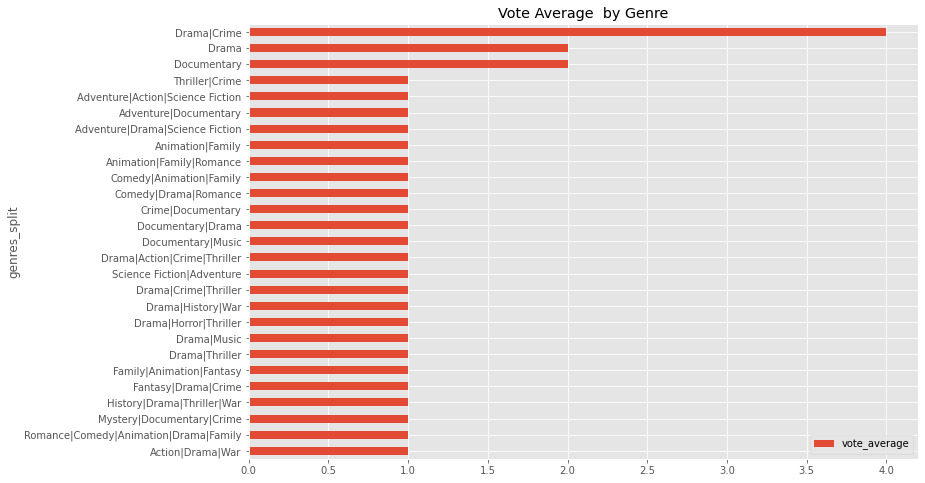

In [33]:
genres_vote[['vote_average']].plot.barh(title='Vote Average  by Genre')

Research Hypotheses (H):

The best movies according to vote avg. return high profit and revenue.

The best movies according to popularity return high profit and revenue.

Highly budgeted movies return high revenue and profit.

Highly budgeted movies have a high popularity.

In [34]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\imdb_movies (1).csv")

In [35]:
df.drop_duplicates(inplace=True)

In [36]:
df['profit']=df['revenue']-df['budget']
df_genre = df[['popularity','budget','revenue','original_title','runtime','genres','release_date','vote_count','vote_average','profit']]

In [37]:
df_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.300000,1316249360


## 1.The best movies according to vote avg. return high profit and revenue.

In [38]:
movies_counted = df_genre[df_genre['vote_count'] >= 50]
movies_counted.corr(method='spearman')


,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.485149,0.588739,0.230518,0.768966,0.188670,0.498117
budget,0.485149,1.000000,0.714828,0.360230,0.554586,-0.044440,0.334390
revenue,0.588739,0.714828,1.000000,0.341707,0.682656,0.111731,0.842221
runtime,0.230518,0.360230,0.341707,1.000000,0.263460,0.285514,0.212060
vote_count,0.768966,0.554586,0.682656,0.263460,1.000000,0.284470,0.583602
vote_average,0.188670,-0.044440,0.111731,0.285514,0.284470,1.000000,0.198308
profit,0.498117,0.334390,0.842221,0.212060,0.583602,0.198308,1.000000


<AxesSubplot:xlabel='vote_average', ylabel='profit'>

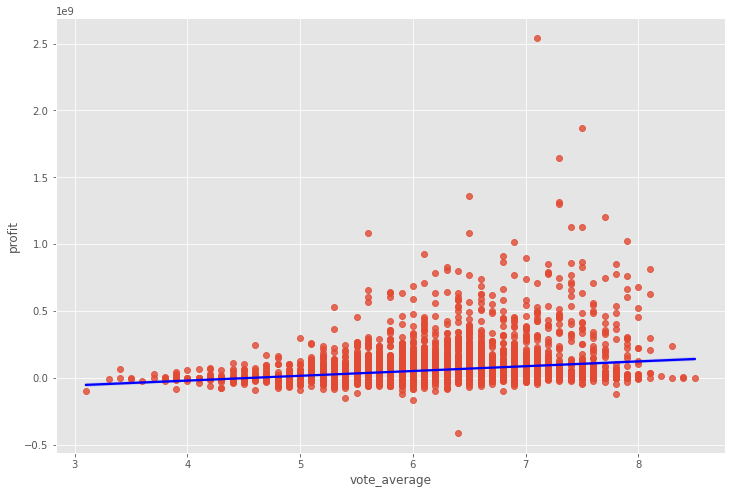

In [39]:
sns.regplot(x='vote_average',y='profit', data=movies_counted,line_kws={"color":"Blue"})

<AxesSubplot:xlabel='vote_average', ylabel='revenue'>

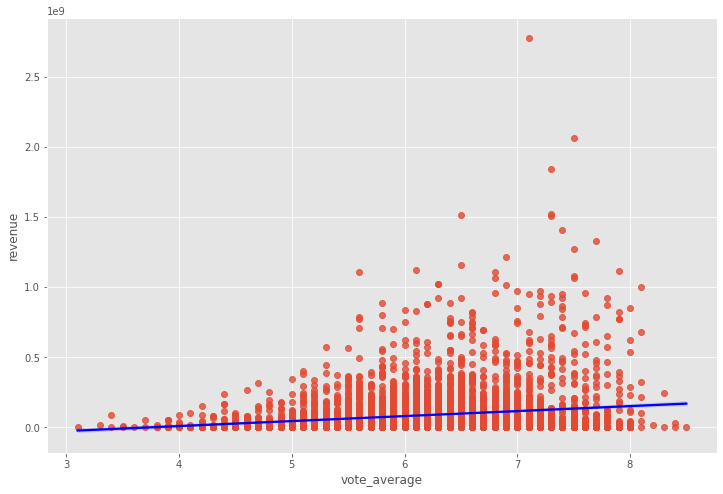

In [40]:
sns.regplot(x='vote_average',y='revenue', data=movies_counted,line_kws={"color":"Blue"})

## 2.The best movies according to popularity return high profit and revenue

In [41]:
movies_counted.corr(method='spearman')

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.485149,0.588739,0.230518,0.768966,0.188670,0.498117
budget,0.485149,1.000000,0.714828,0.360230,0.554586,-0.044440,0.334390
revenue,0.588739,0.714828,1.000000,0.341707,0.682656,0.111731,0.842221
runtime,0.230518,0.360230,0.341707,1.000000,0.263460,0.285514,0.212060
vote_count,0.768966,0.554586,0.682656,0.263460,1.000000,0.284470,0.583602
vote_average,0.188670,-0.044440,0.111731,0.285514,0.284470,1.000000,0.198308
profit,0.498117,0.334390,0.842221,0.212060,0.583602,0.198308,1.000000


<AxesSubplot:xlabel='popularity', ylabel='revenue'>

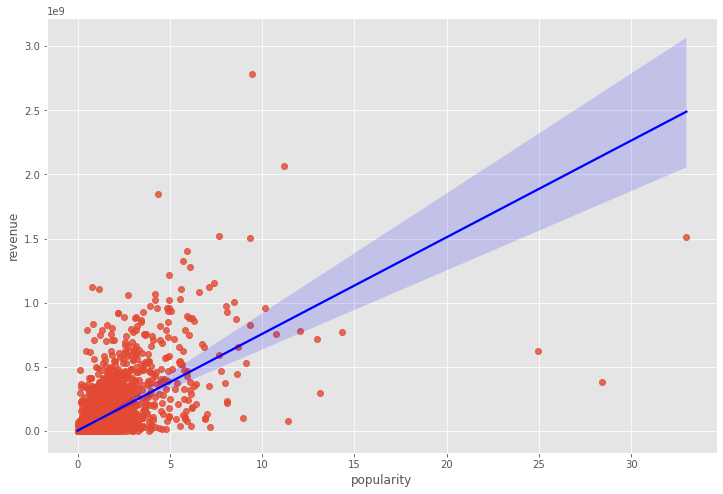

In [42]:
sns.regplot(x='popularity',y='revenue', data=movies_counted,line_kws={"color":"Blue"})

<AxesSubplot:xlabel='popularity', ylabel='profit'>

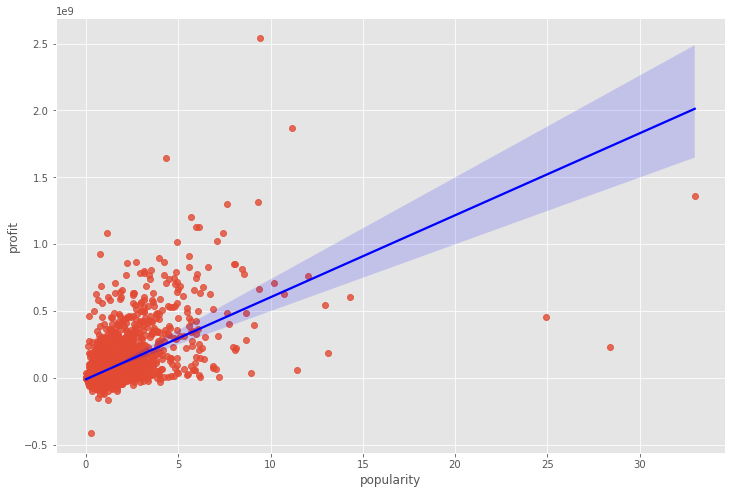

In [43]:
sns.regplot(x='popularity',y='profit', data=movies_counted,line_kws={"color":"Blue"})

## 3.Highly budgeted movies return high profit.

In [44]:
movies_counted.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.300000,1316249360


<AxesSubplot:xlabel='budget', ylabel='profit'>

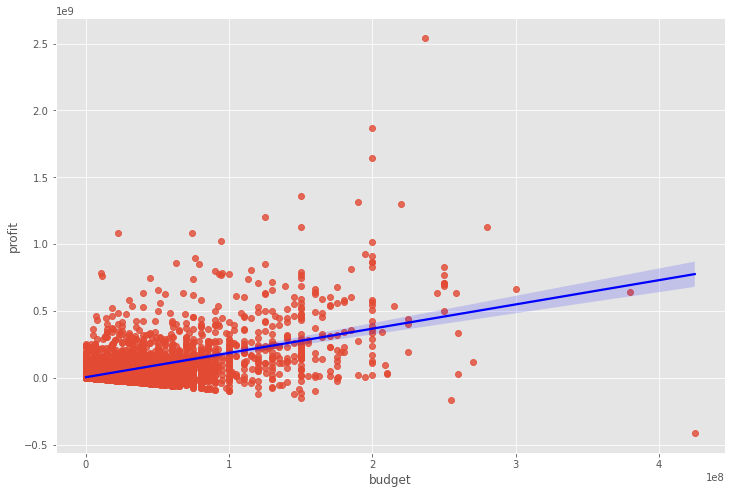

In [45]:
sns.regplot(x='budget',y='profit', data=movies_counted,line_kws={"color":"Blue"})

## 4.Take a look at Profit Per Genres per Year

In [37]:
df_genre.head()

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.100000,228436354,Action


In [42]:
df_genre2 = df[['popularity','budget','revenue','original_title','runtime','genres','release_year','vote_count','vote_average','profit']]

In [43]:
df_genre2

,popularity,budget,revenue,original_title,runtime,genres,release_year,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015,2947,7.300000,1316249360
...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,95,Documentary,1966,11,7.400000,0
10862,0.065543,0,0,Grand Prix,176,Action|Adventure|Drama,1966,20,5.700000,0
10863,0.065141,0,0,Beregis Avtomobilya,94,Mystery|Comedy,1966,11,6.500000,0
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,Action|Comedy,1966,22,5.400000,0


In [44]:
from pandas import Series, DataFrame

# Split the genres column
split = df_genre2['genres'].str.split('|').apply(Series, 1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'

# Remove the original genres column
del df_genre2['genres']

# Join the split genres back to df_genre2
df_genre3 = df_genre2.join(split)


In [45]:
df_genre3

,popularity,budget,revenue,original_title,runtime,release_year,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015,6185,7.100000,228436354,Action
...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,Beregis Avtomobilya,94,1966,11,6.500000,0,Mystery
10863,0.065141,0,0,Beregis Avtomobilya,94,1966,11,6.500000,0,Comedy
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,1966,22,5.400000,0,Action
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,1966,22,5.400000,0,Comedy


In [46]:
time_genre = pd.DataFrame(df_genre3.groupby(['release_year','genres_split'])['profit'].mean())

In [47]:
time_genre

profit
release_year genres_split                   
1960         Action           6363125.000000
             Adventure         431000.000000
             Comedy           5258750.000000
             Crime                  0.000000
             Drama            8245619.384615
...                                      ...
2015         Science Fiction 83321303.523256
             TV Movie         -150000.000000
             Thriller        32869106.847953
             War             54677314.333333
             Western         72856619.000000

[1049 rows x 1 columns]

In [49]:
final_genre = pd.pivot_table(time_genre,values='profit',index=['genres_split'],columns=['release_year'])

Text(0.5, 1.0, 'Genres by Profit per Year')

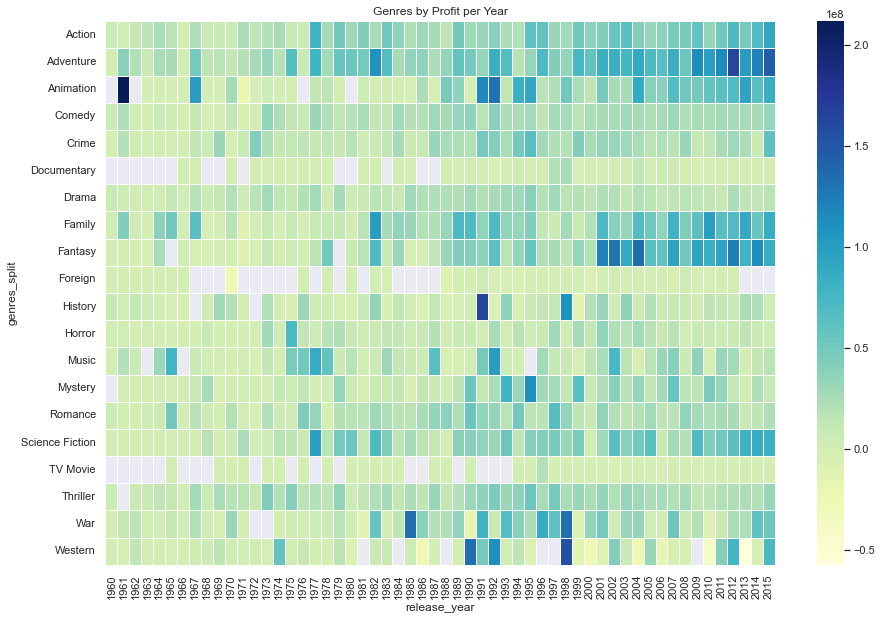

In [56]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(final_genre,cmap='YlGnBu',linewidths= .5)
plt.title('Genres by Profit per Year')